In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import lines
import matplotlib.cm as cm
import tqdm
from tqdm.notebook import tqdm as tqdm

_cmap = plt.cm.jet

In [2]:
# 勾配の計算
def compute_grad(X,y,w):
    N = X.shape[0]
    tmp = X.dot(w) - y
    grad = X.T.dot(tmp) / N
    return grad

In [3]:
class Iterative:
    
    def __init__(self, w,t_max):

        self.w = w
        self.t_max = t_max
        self.t = 0
        self.wstore = []
        
    def __iter__(self):
        return self
        
    def __next__(self):
        self.t += 1
        if self.t > self.t_max:
            raise StopIteration
        else:
            self.wstore.append(self.w)
            
    def update(self,a,grad):
        self.w = self.w - a * grad

In [4]:
# データセットの生成
# Xはd次元、N個の行列, yはXのそれぞれのサンプルに対する真の値
# errが大きいとばらつきのあるデータセットになる。
def generate_data(d=1,N=10,err=0.001):
    w = np.ones(d) / d
    X = np.random.randn(N, d)
    y = X.dot(w) + err * np.random.randn(N)
    init_w = w + np.random.randn(d)
    return X,y,init_w,w

In [5]:
# ２乗誤差の算術平均
def quadratic_loss(X,y,w):
    tmp = X.dot(w) - y
    loss = 0.5 * np.mean(tmp ** 2)
    return loss

最終重みw: [0.99913741]


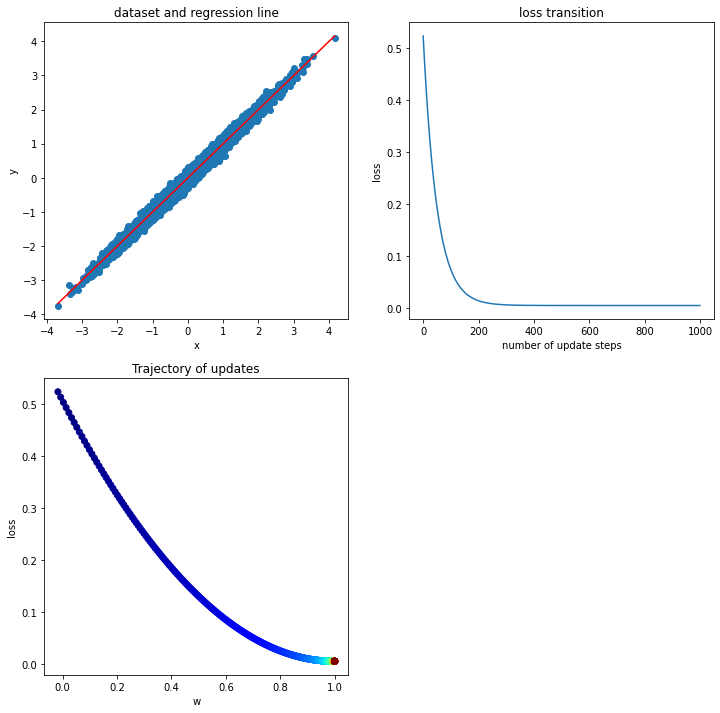

In [6]:
# １次元
X,y,w_init,w = generate_data(d=1,N=10000,err=0.1)
#　ほぼ真の重み
true_w = w
#　真の重みにランダムな値を与えた初期値の重み
w = w_init
# 学習率
a = 0.01
# 誤差の推移
loss_transition = []
# ステップ数
M = 1000
k = Iterative(w = w,t_max=M)
for i in k:
    loss_transition.append(quadratic_loss(X,y,w))
    grad = compute_grad(X,y,w)
    k.update(a=a,grad=grad)
    w = k.w
    
w_store = np.array(k.wstore)

print("最終重みw: {}".format(k.w))
myfig = plt.figure(figsize=(12,12))
ax1 = myfig.add_subplot(2,2,1)
plt.title("dataset and regression line")
plt.xlabel('x')
plt.ylabel('y')
func = lambda x: x * w
x_max,x_min = np.max(X),np.min(X)
line = lines.Line2D([x_min, x_max], [func(x_min), func(x_max)], color='r')
ax1.add_line(line)
ax1.scatter(X,y)

ax2 = myfig.add_subplot(2,2,2)
plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(M)),loss_transition)

ax3 = myfig.add_subplot(2,2,3)
plt.title("Trajectory of updates")
plt.xlabel('w')
plt.ylabel('loss')
c = np.linspace(0, M, len(w_store))
#ax3.plot(w_store, loss_transition, color="xkcd:red") # to connect points.
ax3.scatter(w_store,loss_transition, c=c, cmap = _cmap)
plt.show()



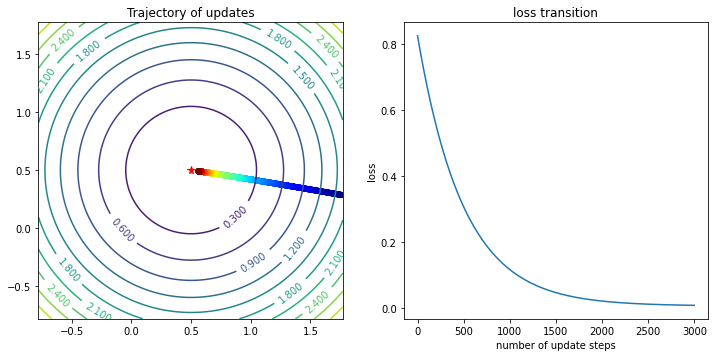

In [7]:
# ２次元
X,y,w_init,w = generate_data(d=2,N=10000,err=0.1)
w_star = w
w = w_init
# 学習率
a = 0.001
# 誤差の推移
loss_transition = []
# ステップ数
M = 3000

k = Iterative(w = w,t_max=M)
for i in k:
    loss_transition.append(quadratic_loss(X,y,w))
    grad = compute_grad(X,y,w)
    k.update(a=a,grad=grad)
    w = k.w

# wの推移
w_store = np.array(k.wstore)

# 等高線描画用
def f(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2

tmpdel = np.linalg.norm(w_star-w_init) * 1
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = f(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=10)
c = np.linspace(0, M, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)
CS.clabel(inline=1, fontsize=10)

ax2 = myfig.add_subplot(2,2,2)

plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(M)),loss_transition)

In [8]:
print(grad)

[ 0.06285235 -0.00915477]


In [9]:
X

array([[ 0.67623016, -0.45636606],
       [-1.02215256, -0.72441653],
       [-0.79637196, -0.6273381 ],
       ...,
       [ 0.69817851,  0.72136751],
       [ 0.77733598, -1.06130177],
       [ 0.37865156,  1.20095787]])

In [10]:
X.dot(w)

array([ 0.1562942 , -0.92881692, -0.75447368, ...,  0.745374  ,
       -0.08316871,  0.80078415])

In [11]:
y.shape

(10000,)

In [12]:
tmp = X.dot(w) - y

In [13]:
tmp

array([ 0.14046975, -0.06581246, -0.01749065, ..., -0.08389519,
        0.01998925, -0.06748157])

In [14]:
X.T.dot(tmp) / 10000

array([ 0.06278953, -0.00914492])

In [15]:
X.shape

(10000, 2)

In [16]:
tmp.shape

(10000,)